In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Generate test data
 * Unit circle 500 points
 * Input layer: two coordinates (500,2) array
 * Output layer: one category (500,1) array

(Note, that we use a two dimensional array for target to be more generic and be able to use matrix functions)

In [ ]:
N = 500
np.random.seed(12345)
train_x = np.random.random((N,2)) * 2.0 - 1.0
train_y = np.array([((train_x[:,0]**2+train_x[:,1]**2)<1) + 0]).T
print(np.shape(train_x),np.shape(train_y))

(500, 2) (500, 1)


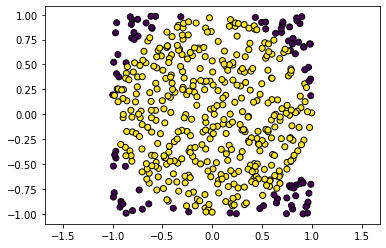

In [ ]:
plt.axis('equal')
plt.scatter(train_x[:,0],train_x[:,1],c=train_y[:,0],edgecolors='black');

### Activation functions
And their derivatives

In [ ]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)

def d_sigmoid(Z):
    sig = sigmoid(Z)
    return sig * (1 - sig)

def d_relu(Z):
    if Z >= 0:
        return 1.0
    else:
        return 0.0

### Feed forward
#### Single layer
$$
\begin{align}
\mathbf{Z}^{(l)} =& \mathbf{W}^{(l)} \cdot \mathbf{A}^{(l-1)}\\
\mathbf{A}^{(l)} =& g^{(l)}(\mathbf{Z}^{(l)}),
\end{align}
$$
where $\mathbf{A}^{(l)}$ is the output, $\mathbf{W}^{(l)}$ is the weight matrix, $g^{(l)}$ is the activation function of layer $l$.

The input of the function `feed_forward(A, W, g)` is, the output of the previous layer `A`, the weight matrix of the layer `W`, and the activation function `g`.

### Weight function
 * Three layer network
 * ML = 7 hidden nodes

In [ ]:
ML = 7
W = [ np.random.random((2,ML))*2-1, np.random.random((ML,1))*2-1 ]

### TASK: Feed Forward
Implement:
`feed_forward(X, W, g):`

For each $l$
$$
\begin{align}
\mathbf{Z}^{(l)} =& \mathbf{W}^{(l)} \cdot \mathbf{A}^{(l-1)}\\
\mathbf{A}^{(l)} =& g^{(l)}(\mathbf{Z}^{(l)}),
\end{align}
$$

In [ ]:
def feed_forward(X, W, g):
  A = X
  for l in range(len(W)):
    A = g(np.dot(A, W[l]))
  return A

### Test it
Now it should give arbitrary pattern

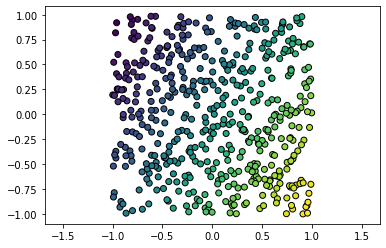

In [ ]:
plt.axis('equal')
plt.scatter(train_x[:,0],train_x[:,1],c=feed_forward(train_x,W,sigmoid)[:,0],edgecolors='black');

### Feedforward with memory
We will need the values of A and Z so let as save it.

The first layer of A is the input and the last layer A is the output. Z is A without the perception function applied.

In [ ]:
memA = [np.zeros((N,2)), np.zeros((N,ML)), np.zeros((N,1))]
memZ = [np.zeros((N,2)), np.zeros((N,ML)), np.zeros((N,1))]

### TASK: Implement feedforward with memory
`feed_forward_with_mem(X, W, g, memA, memZ):` 

The layer `0` is the input it has only the `A` value, so save `X` to `A[0]`, then the next (here the hidden) layer will have the index `1`.

In [ ]:
def feed_forward_with_mem(X, W, g, memA, memZ):
  memA[0] = X
  for l in range(len(W)):
    memZ[l + 1] = np.dot(memA[l], W[l])
    memA[l + 1] = g(memZ[l + 1])

### TASK: Backpropagation
Last error is in $dA^{l+1}$. It is a vector the size of the training data. Originally it is 
$$
dA^{l+1} = Y - A^{l+1}
$$
Algorithm:
$$
\begin{align}
dZ^{l+1}&=dA^{l+1}\ast g'(Z^{l+1})\cr
dA^l&=\frac{\partial L}{\partial A^{l}}=(W^l)^T dZ^{l+1}\cr
dW^l&=\frac{\partial L}{\partial W^l} = \frac{\alpha}{m}dZ^{l+1}(A^{l})^T,
\end{align}
$$
where $m$ is the number of training data points.

The $\ast$ is the element by element matrix multiplication, which is implemented by tadaaam: `*` in python, This is used here as we have to multiply each and every element of $dA$ by the corresponding $g'(Z^{l+1})$ for each data point.

You have to go through the layers in the reverse order starting with the last one. Do not mix up the indices of the arrays. `W` has two layers: layer `0` is between layers `0` and `1` of `A` and `Z`, and layer `1` is between layers `1` and `2` of `A` and `Z`

$\alpha$ is the speed of convergence

In [ ]:
def back_propagation(Y, W, dg, memA, memZ, alpha):
  Y_res = memA[len(W)]
  deltaA = Y - Y_res

  for l in reversed(range(len(W))):
    m = memA[l].shape[0]

    deltaZ = deltaA * dg(memZ[l + 1])
    deltaA = deltaZ.dot(W[l].T)

    W[l] += (alpha / m) * np.dot(memA[l].T, deltaZ)

### TASK: train

In [ ]:
GEN = 20000
acc = np.zeros(GEN)
for i in range(GEN):
    feed_forward_with_mem(train_x, W, sigmoid, memA, memZ)
    acc[i] = np.square(train_y - memA[len(W)]).mean()
    back_propagation(train_y, W, d_sigmoid, memA, memZ, 10)    

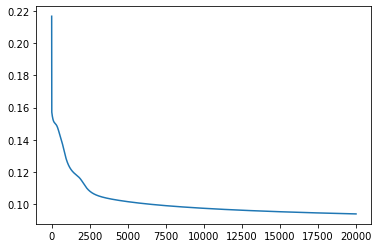

In [ ]:
plt.plot(range(GEN),acc)
plt.show()

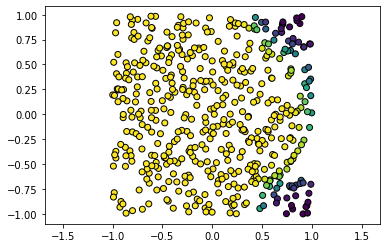

In [ ]:
plt.axis('equal')
plt.scatter(train_x[:,0],train_x[:,1],c=memA[len(W)][:,0],edgecolors='black');

### TASK: contour plot
Make a grid of NGxNG points calculate the predicted value there and plot it

In [ ]:
NG = 100
gx, gy = np.meshgrid(np.linspace(-1, 1, NG), np.linspace(-1, 1, NG))
fgx = gx.flatten()
fgy = gy.flatten()
grid = np.array([fgx, fgy]).T
print(np.shape(train_x), np.shape(grid))

(500, 2) (10000, 2)


In [ ]:
C = feed_forward(grid, W, sigmoid).reshape(NG, NG)
np.shape(C)

(100, 100)

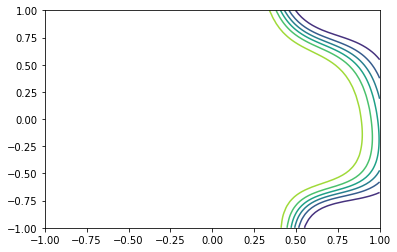

In [ ]:
plt.contour(gx, gy, C)
plt.show()

### Plot the lines of the first layer

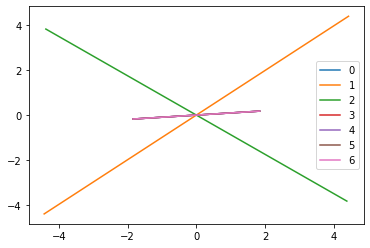

In [ ]:
x = np.linspace(-1,1)
for i in range(ML):
    plt.plot(x*W[0][0][i],(x*W[0][1][i]),label=str(i))
plt.legend()

In [ ]:
print(W[0])

[[ 1.84458672  4.4372915   4.38818908  1.84462415 -1.84502469 -1.84519221
  -1.84508549]
 [ 0.17610971  4.40832495 -3.83698943  0.17609707 -0.17596144 -0.17590484
  -0.1759409 ]]


In [ ]:
print(W[1])

[[-23.16747002]
 [ 19.18055884]
 [ 14.74236063]
 [-22.15348918]
 [ 15.01064661]
 [ 13.25679281]
 [ 14.32154791]]


### More layers
As you could see, without bias with one hidden layer you can only fit one half of the boundary. Add one more layer to fit the whole data! I could fit the data with 7 neurons in both layers.

In [ ]:
# Adding one layer
W2 = [ np.random.random((2,ML))*2-1, np.random.random((ML,ML))*2-1, np.random.random((ML,1))*2-1 ]
memA2 = [np.zeros((N,2)), np.zeros((N,ML)), np.zeros((N,ML)), np.zeros((N,1))]
memZ2 = [np.zeros((N,2)), np.zeros((N,ML)), np.zeros((N,ML)), np.zeros((N,1))]

GEN = 20000
acc2 = np.zeros(GEN)
for i in range(GEN):
    feed_forward_with_mem(train_x, W2, sigmoid, memA2, memZ2)
    acc2[i] = np.square(train_y - memA2[len(W2)]).mean()
    back_propagation(train_y, W2, d_sigmoid, memA2, memZ2, 10)   

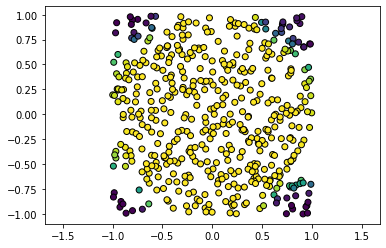

In [ ]:
plt.axis('equal')
plt.scatter(train_x[:,0],train_x[:,1],c=memA2[len(W2)][:,0],edgecolors='black');